In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'data.csv', 'FDA-practice-Decision-Tree', 'FDA_practice', 'HW1part1.ipynb', 'HW1Part2.ipynb', 'Reviews.csv']


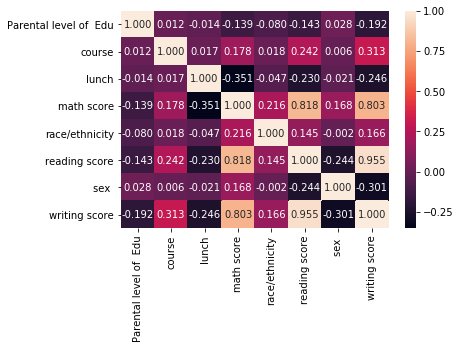

In [83]:
#首先將各文字資料 轉化為數字並存於陣列中方便分析，先做各資料間的相關性分析。
data_path = "./StudentsPerformance.csv"
pd_data = pd.read_csv(data_path,encoding='big5')

gender=pd_data["gender"]
genderm=np.array([])

race=pd_data["race/ethnicity"]
racem=np.array([])

lunch=pd_data["lunch"]
lunchm=np.array([])

course=pd_data["test preparation course"]
coursem=np.array([])

math=pd_data["math score"]
reading=pd_data["reading score"]
writing=pd_data["writing score"]

parentedu=pd_data["parental level of education"]
pm=np.array([])

for i in range(0,1000):
    if (gender[i]=='male'):
        genderm=np.append(genderm,1)
    else:
        genderm=np.append(genderm,0)
for k in range(0,1000):
    if (race[k]=='group A'):
        racem=np.append(racem,1)
    elif (race[k]=='group B'):
        racem=np.append(racem,2)
    elif (race[k]=='group C'):
        racem=np.append(racem,3)
    elif (race[k]=='group D'):
        racem=np.append(racem,4)
    else:
        racem=np.append(racem,5)
for m in range(0,1000):
    if (lunch[m]=='standard'):
        lunchm=np.append(lunchm,0)
    else:
        lunchm=np.append(lunchm,1)
for n in range(0,1000):
    if (course[n]=='none'):
        coursem=np.append(coursem,0)
    else:
        coursem=np.append(coursem,1)
for l in range(0,1000):
    if (parentedu[l] == "bachelor's degree"):
        pm=np.append(pm,0)
    elif (parentedu[l] == "some college"):
        pm=np.append(pm,1)
    elif (parentedu[l] == "master's degree"):
        pm=np.append(pm,2)
    elif (parentedu[l] == "associate's degree"):
        pm=np.append(pm,3)
    elif (parentedu[l] == "high school"):
        pm=np.append(pm,4)        
    elif (parentedu[l] == "some high school"):
        pm=np.append(pm,5)
    
GM=pd.Series(genderm)
RM=pd.Series(racem)
LM=pd.Series(lunchm)
CM=pd.Series(coursem)
PM=pd.Series(pm)
df = pd.DataFrame({'Parental level of  Edu':PM,'sex ':GM,'race/ethnicity':RM,'lunch':LM,'course':CM,'math score':math,'reading score':reading,'writing score':writing})
#df
df.corr()
sns.heatmap(df.corr(),annot=True, fmt=".3f")   
#可看出
#1.數學與閱讀及寫作成績彼此之間呈現高度相關，即成績好者通常三科都不錯。
#2.看到course與考試成績皆呈現正關聯性，故以下做詳細分析。
#3.看到race與考試成績皆呈現正相關性，故以下做詳細分析
#4.性別與數學成績有相關性


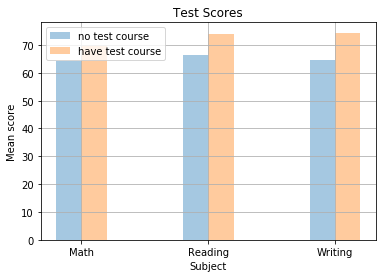

In [54]:
#從各類數據的相關係數觀察，首先我們比較對於有沒有上"test preparation course"及成績的關係
sumnone = 0
sumnoner =0
sumnonew =0
sumy = 0
sumr = 0
sumw = 0
p = 0
q = 0
for o in range(0,1000):
    if (CM[o] == 0):
        sumnone = sumnone+math[o] 
        sumnoner =sumnoner+reading[o]
        sumnonew =sumnonew+writing[o]
        p= p+1
    else:
        sumy = sumy+math[o]
        sumr = sumr+reading[o]
        sumw = sumw+writing[o]
        q= q+1
avmn=sumnone/p
avm=sumy/q

avrn=sumnoner/p
avr=sumr/q

avwn=sumnonew/p
avw=sumw/q

nonecourse = (avmn,avrn,avwn)
hcourse = (avm,avr,avw)

col_count = 3
bar_width = 0.2
index = np.arange(col_count)

A = plt.bar(index,
           nonecourse, 
           bar_width,
           alpha=.4,
           label="no test course") 
B = plt.bar(index+0.2,
            hcourse,
            bar_width,
            alpha=.4,
            label="have test course") 
plt.ylabel("Mean score")
plt.xlabel("Subject")
plt.title("Test Scores")
plt.xticks(index+.3 / 3 ,("Math","Reading","Writing"))
plt.legend() 
plt.grid(True)

plt.show()
#for 1000位學生，從圖表可見，有上考試準備課"test preparation course"，三科成績都會較高。

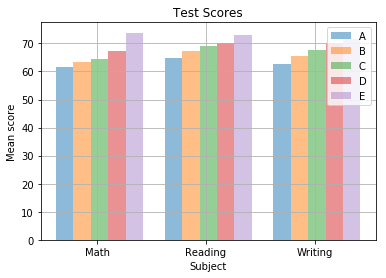

In [82]:
#從各類數據的相關係數觀察，首先我們比較對於不同race/ethnicity及成績的關係
sumam = 0
sumbm = 0
sumcm = 0
sumdm = 0
sumem = 0

sumar = 0
sumbr = 0
sumcr = 0
sumdr = 0
sumer = 0

sumaw = 0
sumbw = 0
sumcw = 0
sumdw = 0
sumew = 0

a = 0
b = 0
c = 0
d = 0
e = 0
for s in range(0,1000):
    if (RM[s] == 1):
        sumam = sumam + math[s]
        sumar = sumar + reading[s]
        sumaw = sumaw + writing[s]
        a = a+1
       
    elif (RM[s] == 2):
        sumbm = sumbm + math[s]
        sumbr = sumbr + reading[s]
        sumbw = sumbw + writing[s]
        b = b+1        
    elif (RM[s] == 3):
        sumcm = sumcm + math[s]
        sumcr = sumcr + reading[s]
        sumcw = sumcw + writing[s]
        c = c+1             
    elif (RM[s] == 4):
        sumdm = sumdm + math[s]
        sumdr = sumdr + reading[s]
        sumdw = sumdw + writing[s]
        d = d+1     
    elif (RM[s] == 5):
        sumem = sumem + math[s]
        sumer = sumer + reading[s]
        sumew = sumew + writing[s]
        e = e+1             
avgam=sumam/a
avgar=sumar/a
avgaw=sumaw/a

avgbm=sumbm/b
avgbr=sumbr/b
avgbw=sumbw/b

avgcm=sumcm/c
avgcr=sumcr/c
avgcw=sumcw/c

avgdm=sumdm/d
avgdr=sumdr/d
avgdw=sumdw/d

avgem=sumem/e
avger=sumer/e
avgew=sumew/e

groupA=(avgam,avgar,avgaw)
groupB=(avgbm,avgbr,avgbw)
groupC=(avgcm,avgcr,avgcw)
groupD=(avgdm,avgdr,avgdw)
groupE=(avgem,avger,avgew)

col_count = 3
bar_width = 0.16
index = np.arange(col_count)

A = plt.bar(index,
           groupA, 
           bar_width,
           alpha=.5,
           label="A") 
B = plt.bar(index+0.16,
            groupB,
            bar_width,
            alpha=.5,
            label="B") 
C = plt.bar(index+0.32,
            groupC,
            bar_width,
            alpha=.5,
            label="C") # x,y ,width
D = plt.bar(index+0.48,
            groupD,
            bar_width,
            alpha=.5,
            label="D") # x,y ,width
E = plt.bar(index+0.64,
            groupE,
            bar_width,
            alpha=.4,
            label="E") # x,y ,width
plt.ylabel("Mean score")
plt.xlabel("Subject")
plt.title("Test Scores")
plt.xticks(index+.3 / 1 ,("Math","Reading","Writing"))
plt.legend() 
plt.grid(True)


plt.show()
#for 1000 students，可看出從groupA到E ，三科平均成績也漸漸提高，故可判斷group程度
